In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob

### Task 1: Drop unnecessary columns

In [44]:
df = pd.read_csv("./Data1/JawaTimur-Copy1.csv")

df.head()

,id,id_str,created,text,fav_count,user_name,user_description,user_location,user_created,user_followers
0,1,1257616185383727107,2020-05-05T10:20:38,@talksweetae @BTS_twt THANK YOU TAEKOOK @BTS_twt,0,jeon_ctr,7 kings and 5 boys💖 🐰\nfan account @BTS_twt an...,Indonesia,2015-01-02T13:12:18,704
1,2,1257616189603352578,2020-05-05T10:20:39,Lagu2 korea 80-90an yg bisa bikin nangis sesen...,0,satyadiahkusuma,Easily overwhelmed.,"Malang, Jawa Timur",2012-10-07T03:50:26,260
2,3,1257616204136472577,2020-05-05T10:20:43,@Choironi_N hmm mulutnya,0,withamission_,"gatau ah, pgn jdi trumbu karang.",난바 Hatch,2015-11-09T13:13:36,320
3,4,1257616206745534464,2020-05-05T10:20:43,sebagai perusahaan media serta bidang penyiara...,0,antonCahbagus,| i'll be your family man | ♡ mobile photograp...,NaN,2009-05-07T02:24:43,532
4,5,1257616209970819073,2020-05-05T10:20:44,@Ladymartabak Noted.,0,AnyaW2502,Kalo kesinggung yauda.,"Kota Surabaya, Jawa Timur",2019-07-16T12:11:49,51


In [45]:
df_new = df.drop(columns=["id", "id_str", "text", "fav_count", "user_description", "user_location", "user_created"])

df_new.head()

,created,user_name,user_followers
0,2020-05-05T10:20:38,jeon_ctr,704
1,2020-05-05T10:20:39,satyadiahkusuma,260
2,2020-05-05T10:20:43,withamission_,320
3,2020-05-05T10:20:43,antonCahbagus,532
4,2020-05-05T10:20:44,AnyaW2502,51


### Task 2: Add a location column

In [46]:
df_new["province"] = "Jawa Timur"

df_new.head()

,created,user_name,user_followers,province
0,2020-05-05T10:20:38,jeon_ctr,704,Jawa Timur
1,2020-05-05T10:20:39,satyadiahkusuma,260,Jawa Timur
2,2020-05-05T10:20:43,withamission_,320,Jawa Timur
3,2020-05-05T10:20:43,antonCahbagus,532,Jawa Timur
4,2020-05-05T10:20:44,AnyaW2502,51,Jawa Timur


### Task 3: Import into a CSV

In [47]:
df_new.to_csv("provi_jatim.csv", index =False)

### Task 4: Merge all CSV into one

In [3]:
semua_files = sorted(glob("Data1/provi_*.csv"))
semua_files

['Data1/provi_bali.csv',
 'Data1/provi_banten.csv',
 'Data1/provi_jabar.csv',
 'Data1/provi_jakarta.csv',
 'Data1/provi_jateng.csv',
 'Data1/provi_jatim.csv',
 'Data1/provi_jogjakarta.csv']

In [4]:
df_con = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in semua_files), ignore_index = True)

df_con

,created,user_name,user_followers,province,filename
0,2020-05-05T10:24:26,manestii,124,Bali,Data1/provi_bali.csv
1,2020-05-05T10:24:30,tjokagungray1,42,Bali,Data1/provi_bali.csv
2,2020-05-05T10:24:43,ariexwind,98,Bali,Data1/provi_bali.csv
3,2020-05-05T10:25:20,Kadek_Senox,328,Bali,Data1/provi_bali.csv
4,2020-05-05T10:25:29,Chondro_All_It,186,Bali,Data1/provi_bali.csv
...,...,...,...,...,...
723304,2020-05-20T01:03:24,NurhudaFaozi,18,DI Yogyakarta,Data1/provi_jogjakarta.csv
723305,2020-05-20T01:03:27,_herijuno,50,DI Yogyakarta,Data1/provi_jogjakarta.csv
723306,2020-05-20T01:03:33,POLSEK_JTJOGJA,9,DI Yogyakarta,Data1/provi_jogjakarta.csv
723307,2020-05-20T01:03:43,haisusucoklat,20,DI Yogyakarta,Data1/provi_jogjakarta.csv


### Task 5: Drop filename column and add Tweets quantity

In [5]:
df = df_con.drop(columns=["filename"])
df.head()

,created,user_name,user_followers,province
0,2020-05-05T10:24:26,manestii,124,Bali
1,2020-05-05T10:24:30,tjokagungray1,42,Bali
2,2020-05-05T10:24:43,ariexwind,98,Bali
3,2020-05-05T10:25:20,Kadek_Senox,328,Bali
4,2020-05-05T10:25:29,Chondro_All_It,186,Bali


In [6]:
df["tweet_quantity"] = 1

df

,created,user_name,user_followers,province,tweet_quantity
0,2020-05-05T10:24:26,manestii,124,Bali,1
1,2020-05-05T10:24:30,tjokagungray1,42,Bali,1
2,2020-05-05T10:24:43,ariexwind,98,Bali,1
3,2020-05-05T10:25:20,Kadek_Senox,328,Bali,1
4,2020-05-05T10:25:29,Chondro_All_It,186,Bali,1
...,...,...,...,...,...
723304,2020-05-20T01:03:24,NurhudaFaozi,18,DI Yogyakarta,1
723305,2020-05-20T01:03:27,_herijuno,50,DI Yogyakarta,1
723306,2020-05-20T01:03:33,POLSEK_JTJOGJA,9,DI Yogyakarta,1
723307,2020-05-20T01:03:43,haisusucoklat,20,DI Yogyakarta,1


#### Q1: What province has the most Tweets? Why it has the most Tweets?

In [15]:
hasil = df.groupby("province").sum()

hasil

,user_followers,tweet_quantity
province,,
Bali,31840539,28455
Banten,48473224,28020
DI Yogyakarta,365705263,104750
DKI Jakarta,700386550,213395
Jawa Barat,131221624,126904
Jawa Tengah,58583305,89420
Jawa Timur,96963201,132365


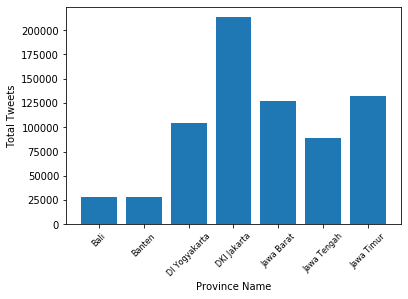

In [8]:
cities = [city for city, df in df.groupby("province")] 

plt.bar(cities, hasil["tweet_quantity"])

plt.xticks(cities, rotation=45, size=8)
plt.ylabel("Total Tweets")
plt.xlabel("Province Name")
plt.show()

#### Q2: Which city has the most User?

In [10]:
user = df.drop_duplicates(["user_name"], keep="first")

user

,created,user_name,user_followers,province,tweet_quantity
0,2020-05-05T10:24:26,manestii,124,Bali,1
1,2020-05-05T10:24:30,tjokagungray1,42,Bali,1
2,2020-05-05T10:24:43,ariexwind,98,Bali,1
3,2020-05-05T10:25:20,Kadek_Senox,328,Bali,1
4,2020-05-05T10:25:29,Chondro_All_It,186,Bali,1
...,...,...,...,...,...
723265,2020-05-20T00:58:09,fir_mans,355,DI Yogyakarta,1
723282,2020-05-20T01:00:14,785Hadi,217,DI Yogyakarta,1
723287,2020-05-20T01:00:50,Ticka_Aini,69,DI Yogyakarta,1
723304,2020-05-20T01:03:24,NurhudaFaozi,18,DI Yogyakarta,1


In [12]:
user_prov = user.groupby("province").sum()

user_prov

,user_followers,tweet_quantity
province,,
Bali,3959619,4018
Banten,4461057,3020
DI Yogyakarta,8117562,8615
DKI Jakarta,37502755,20273
Jawa Barat,10136511,13605
Jawa Tengah,3984735,9662
Jawa Timur,7243338,13951


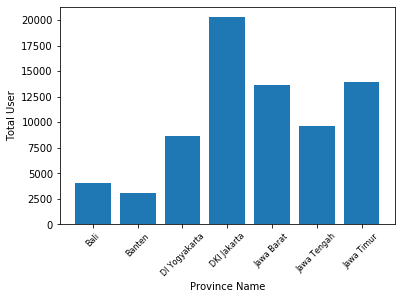

In [13]:
cities = [city for city, df in user.groupby("province")] 

plt.bar(cities, user_prov["tweet_quantity"])

plt.xticks(cities, rotation=45, size=8)
plt.ylabel("Total User")
plt.xlabel("Province Name")
plt.show()

#### Q3: Why Jakarta has the most Tweets?

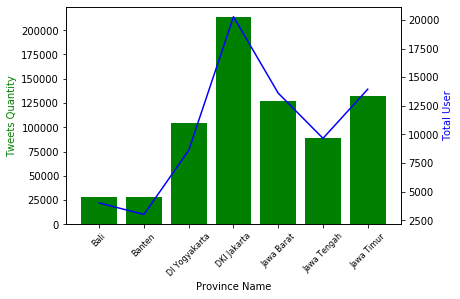

In [19]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(cities, hasil["tweet_quantity"],color="g")
ax2.plot(cities, user_prov["tweet_quantity"], "b-")

ax1.set_xlabel("Province Name")
ax1.set_ylabel("Tweets Quantity", color="g")
ax2.set_ylabel("Total User", color="b")
ax1.set_xticklabels(cities, rotation=45, size=8)

plt.show()

#### Q4: What time most Tweets?

In [7]:
df["created"] = pd.to_datetime(df["created"])

In [8]:
df["hour"] = df["created"].dt.hour

df.head()

,created,user_name,user_followers,province,tweet_quantity,hour
0,2020-05-05 10:24:26,manestii,124,Bali,1,10
1,2020-05-05 10:24:30,tjokagungray1,42,Bali,1,10
2,2020-05-05 10:24:43,ariexwind,98,Bali,1,10
3,2020-05-05 10:25:20,Kadek_Senox,328,Bali,1,10
4,2020-05-05 10:25:29,Chondro_All_It,186,Bali,1,10


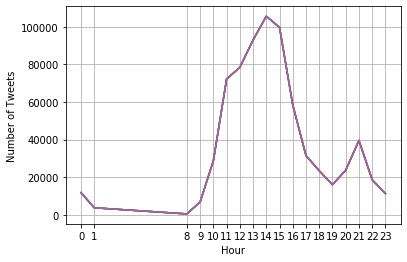

In [27]:
hours = [hour for hour, df in df.groupby("hour")]

plt.plot(hours, df.groupby(["hour"]).count())

plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Tweets")
plt.grid()

plt.show()

#### Q5: What day most Tweets?

In [9]:
df["day"] = df["created"].dt.day

df

,created,user_name,user_followers,province,tweet_quantity,hour,day
0,2020-05-05 10:24:26,manestii,124,Bali,1,10,5
1,2020-05-05 10:24:30,tjokagungray1,42,Bali,1,10,5
2,2020-05-05 10:24:43,ariexwind,98,Bali,1,10,5
3,2020-05-05 10:25:20,Kadek_Senox,328,Bali,1,10,5
4,2020-05-05 10:25:29,Chondro_All_It,186,Bali,1,10,5
...,...,...,...,...,...,...,...
723304,2020-05-20 01:03:24,NurhudaFaozi,18,DI Yogyakarta,1,1,20
723305,2020-05-20 01:03:27,_herijuno,50,DI Yogyakarta,1,1,20
723306,2020-05-20 01:03:33,POLSEK_JTJOGJA,9,DI Yogyakarta,1,1,20
723307,2020-05-20 01:03:43,haisusucoklat,20,DI Yogyakarta,1,1,20


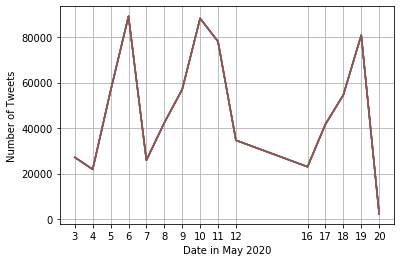

In [32]:
days = [day for day, df in df.groupby("day")]

plt.plot(days, df.groupby(["day"]).count())

plt.xticks(days)
plt.xlabel("Date in May 2020")
plt.ylabel("Number of Tweets")
plt.grid()

plt.show()

In [10]:
df.to_csv('Data_Deskriptif.csv', index=False)